# **Asteroid Threat Detection using Machine Learning**

By Radyatra Sidharta

## I. Introduction

### a. Table of Content
- I. Introduction
    - a. Table of Content
    - b. Problem Description
    - c. Objective

- II. Library Import

- III. Data Loading

- IV. Exploratory Data Analysis (EDA)
    - a. Summary of Dataset
    - b. Asteroid Sizes
    - c. Asteroid Relative Velocity
    - d. Asteroid Miss Distance
    - e. Absolute Magnitude
    - f. Notes for Orbiting Body and Sentry Object
    - g. Class Balance
    - h. Merging Features

- V. Data Preprocessing
    - a. Feature Selection
        - 1. Checking Correlation of Features to Target
        - 2. Checking Multicollinearity
    - b. Splitting Dataset
    - c. Data Balancing
    - d. Outlier Handling
    - e. Feature Scaling

- VI. Model Definition
    - a. Logistic Regression
    - b. Decision Tree
    - c. Random Forest
    - d. K-Nearest Neighbors

- VII. Model Training
    - a. Logistic Regression
    - b. Decision Tree
    - c. Random Forest
    - d. K-Nearest Neighbors

- VIII. Model Evaluation
    - a. Grid Search Cross-Validation and Model Definition
    - b. Model Training (Improved Model)
    - c. Model Evaluation (Improved Model)

- IX. Model Inference
- X. Model Saving
- XI. Conclusion

### b. Problem Description

"The American space agency's Dart probe has smashed into an asteroid, destroying itself in the process. The collision was intentional and designed to test whether space rocks that might threaten Earth could be nudged safely out of the way."

The quote above describes a news article posted on the September 28, 2022 on the BBC news website, where Dr Lori Glaze, the director of planetary science at the space agency was interview after the successful collision of the probe.

"We're embarking on a new era of humankind, an era in which we potentially have the capability to protect ourselves from something like a dangerous hazardous asteroid impact. What an amazing thing; we've never had that capability before," she would say. 

Although sky surveys have identified more than 95% of the monster asteroids that could initiate a global extinction were they to collide with Earth, it is evaluated that none of them would come near Earth. However, this still leaves many undetected smaller objects that could create a catastrophe, if only on smaller, more relatively local scale.

However...

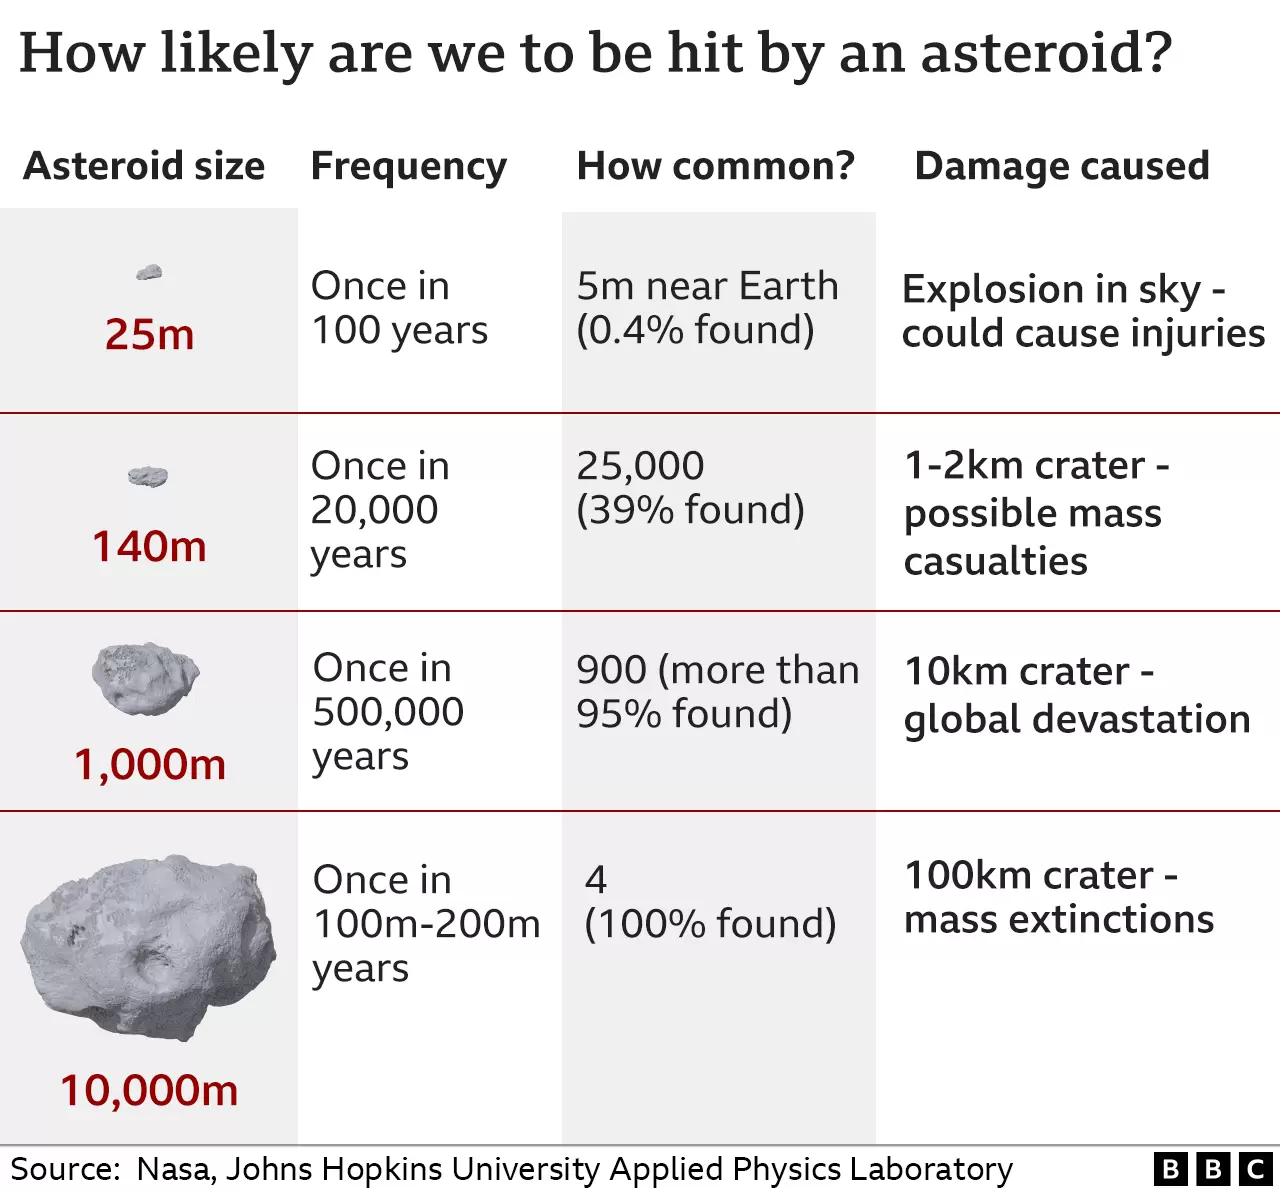

In [1]:
from PIL import Image
myImage = Image.open("risks_of_asteroids.png")
myImage

The table above indicates to us that the chances of us being struck by a devastating Asteroid is remote. Even so, we should not continue to rest on the assumption that this event is unlikely in our lifetime. Therefore, further improvements in the detection and interception of such near Earth objects are needed. This notebook will be discussing one such Machine Learning model that can be used for threat detection of Asteroids.

News Article Link: https://bbc.in/3dQ6TDY

### c. Objective

Create a Supervise Machine Learning model to classify Near Earth Objects (Asteroids) as a Threat or No Threat to planet Earth based on acquired dataset.

## II. Library Import

In [2]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import phik
import pickle

import warnings
warnings.filterwarnings('ignore')

# For EDA
from statistics import mode

# For Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# For Data Balancing
from imblearn.under_sampling import NearMiss, RandomUnderSampler 

# For Feature Encoding
from sklearn.preprocessing import OneHotEncoder

# Handling Outlier
from feature_engine.outliers import Winsorizer

# For Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# For Principal Component Analysis
from sklearn.decomposition import PCA

# For Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz

# Calculate the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

# To Evaluate and Improve Models
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

## III. Data Loading

In [3]:
# Loading the csv file using pd.read.
df = pd.read_csv('Asteroid_Data.csv')
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


The dataset we are using includes information on the estimated diameter (size) of the Asteroid, as well as its relative velocity, miss distance, orbiting body, sentry object, and absolute magnitude. These columns will henceforth be called "Features" as they are our independent variables that may or may not effect our dependent variable, or henceforth called, "Target" (the column "hazardous"). The ID and Name columns are present as labels.

Details regarding the definition of each features will be given in the following chapters.

Dataset Link: https://bit.ly/3Sl3E6p

## IV. Exploratory Data Analysis (EDA)

The Exploratory Data Analysi (EDA) process is done as a introduction to our dataset in which numerous parameters are ascertained and several assumptions are made.

### a. Summary of Dataset

In [4]:
# Identifying types of data for each column in our dataset.
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

From the list above, we can ascertain that all our features are numerical in form (est_diameter_min to absolute_magnitude), except for sentry_object.

In [5]:
# Finding NaNs (Not a Number) / Nulls (Zeros) in our data.
df.isnull().sum().sort_values()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

Checking NaNs / Nulls is an important step in our EDA process as inputting such values into our model would cause it to display an error / not work. From the list above, we can conclude that there are no NaNs in our dataset.

In [6]:
# Finding duplicates in our data.
df_dupl = df.duplicated()
df_dupl.sort_values(ascending=False) 

0        False
60587    False
60563    False
60562    False
60561    False
         ...  
30276    False
30275    False
30274    False
30273    False
90835    False
Length: 90836, dtype: bool

Duplicates are also a hazard for our model as it enlarges the error margin for our model. As such, any duplicates should be removed. However, we can see here that we have no duplicates in our dataset. Therefore, we can proceed.

In [7]:
# Identifying number of rows and columns in our dataset.
df.shape

(90836, 10)

We can ascertain here that our dataset has 90836 rows and 10 columns.

In [8]:
# Finding the central tendency, minimum, and maximum values for the numerical columns in our dataset.
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


The table above provides a useful insight into the data we are facing. It is mostly used to observe whether there are particular trends in our data that we should be aware of. One such example is the range of our data; there may be some data that have a value range of only 0 to 1. Even though they are numerical in form, we must be wary that they will be handled differently when it comes to Feature Scaling.

In our case, it would seem that there is nothing out of the ordinary in our dataset. 

*Note that categorical features (or features that are in non-numerical form) are not listed / presented in the table above.

### b. Asteroid Sizes

In [9]:
# Top 5 Largest Asteroids (in terms of Estimated Minimum Diameter)
eda_minL = df.sort_values('est_diameter_min', ascending=False).head(5)
eda_minL

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
36418,2001036,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,5.372124e+07,Earth,False,9.23,False
56533,2000433,433 Eros (A898 PA),23.043847,51.527608,21761.703426,3.120592e+07,Earth,False,10.31,False
37651,2000433,433 Eros (A898 PA),23.043847,51.527608,21402.705247,2.672952e+07,Earth,False,10.31,False
12709,2000433,433 Eros (A898 PA),23.043847,51.527608,15884.252623,5.468808e+07,Earth,False,10.31,False
72472,2001866,1866 Sisyphus (1972 XA),8.640820,19.321462,86394.013285,6.737501e+07,Earth,False,12.44,False


In [10]:
# Top 5 Largest Asteroids (in terms of Estimated Maximum Diameter)
eda_maxL = df.sort_values('est_diameter_max', ascending=False).head(5)
eda_maxL

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
36418,2001036,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,5.372124e+07,Earth,False,9.23,False
56533,2000433,433 Eros (A898 PA),23.043847,51.527608,21761.703426,3.120592e+07,Earth,False,10.31,False
37651,2000433,433 Eros (A898 PA),23.043847,51.527608,21402.705247,2.672952e+07,Earth,False,10.31,False
12709,2000433,433 Eros (A898 PA),23.043847,51.527608,15884.252623,5.468808e+07,Earth,False,10.31,False
72472,2001866,1866 Sisyphus (1972 XA),8.640820,19.321462,86394.013285,6.737501e+07,Earth,False,12.44,False


<AxesSubplot:ylabel='Estimated Min. Diameter (in KM)'>

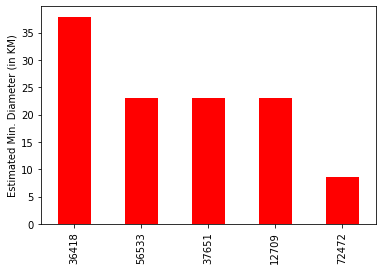

In [11]:
eda_minL['est_diameter_min'].plot(kind='bar', ylabel='Estimated Min. Diameter (in KM)', color='red')

<AxesSubplot:ylabel='Estimated Min. Diameter (in KM)'>

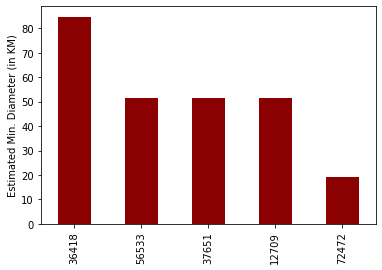

In [12]:
eda_maxL['est_diameter_max'].plot(kind='bar', ylabel='Estimated Min. Diameter (in KM)', color='darkred')

The two bar graphs above shows the top 5 largest Asteroid to be identified in terms of estimated minimum and maximum diameter. The largest Asteroid is that named 1036 Ganymed. Its diameter is estimated to be about a minimum of 37 km and a maximum of about 84 km. In short, all top 5 largest Asteroids are the same in terms of ranking, whether we distinguish them from their minimum or maximum diameter. 

Futhermore, there seems to be an opportunity here to maybe merge the two columns (features) of minimum and maximum estimated diameter into one feature, perhaps that of average diameter.

In [13]:
# Top 5 Smallest Asteroids (in terms of Estimated Minimum Diameter)
eda_minS = df.sort_values('est_diameter_min', ascending=True).head(5)
eda_minS

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
24949,3430497,(2008 TS26),0.000609,0.001362,56751.017090,1.263816e+04,Earth,False,33.20,False
45661,54106298,(2021 BO),0.000683,0.001528,69293.963546,6.947159e+07,Earth,False,32.95,False
88408,54106298,(2021 BO),0.000683,0.001528,70539.503442,7.254528e+07,Earth,False,32.95,False
51038,54106298,(2021 BO),0.000683,0.001528,56370.197452,5.196340e+07,Earth,False,32.95,False
75986,54106298,(2021 BO),0.000683,0.001528,30725.628392,1.686312e+07,Earth,False,32.95,False


In [14]:
# Top 5 Smallest Asteroids (in terms of Estimated Maximum Diameter)
eda_maxS = df.sort_values('est_diameter_max', ascending=True).head(5)
eda_maxS

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
24949,3430497,(2008 TS26),0.000609,0.001362,56751.017090,1.263816e+04,Earth,False,33.20,False
45661,54106298,(2021 BO),0.000683,0.001528,69293.963546,6.947159e+07,Earth,False,32.95,False
88408,54106298,(2021 BO),0.000683,0.001528,70539.503442,7.254528e+07,Earth,False,32.95,False
51038,54106298,(2021 BO),0.000683,0.001528,56370.197452,5.196340e+07,Earth,False,32.95,False
75986,54106298,(2021 BO),0.000683,0.001528,30725.628392,1.686312e+07,Earth,False,32.95,False


<AxesSubplot:ylabel='Estimated Min. Diameter (in KM)'>

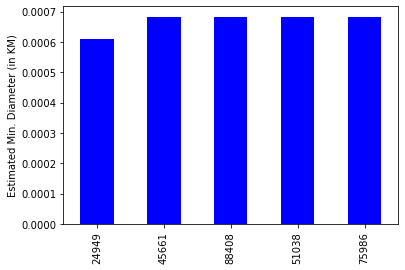

In [15]:
eda_minS['est_diameter_min'].plot(kind='bar', ylabel='Estimated Min. Diameter (in KM)', color='blue')

<AxesSubplot:ylabel='Estimated Min. Diameter (in KM)'>

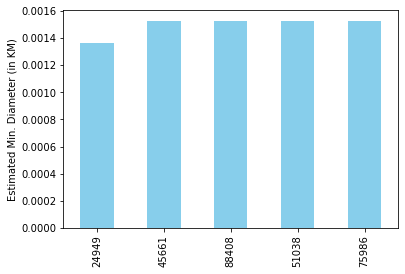

In [16]:
eda_maxS['est_diameter_max'].plot(kind='bar', ylabel='Estimated Min. Diameter (in KM)', color='skyblue')

The two bar graphs above describes the bottom 5 Asteroids in terms of size. The smallest Asteroid to be recorded is that of 2008 TS26, where its estimated minimum diameter is 0.000609 km and its estimated maximum diameter is 0.001362 km. Again, the top 5 smallest Asteroids are the same in ranking for estimated minimum and maximum diameter.

It is interesting to note that the top and bottom 5 Asteroids, in terms of size, do not pose a threat to Planet Earth (as per the "hazardous" column). We can make an assumption then that perhaps size does not determine such outcome.

### c. Asteroid Relative Velocity

The relative velocity is defined as the velocity of an object with respect to another observer. As such, we define here that the velocity (or speed) of the Asteroid is that observed from the planet Earth.

Reference: https://bit.ly/3fq6GYD

In [17]:
# Top 5 Fastest Asteroids
eda_rvL = df.sort_values('relative_velocity', ascending=False).head(5)
eda_rvL

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
57149,3840692,(2019 EJ3),0.079902,0.178665,236990.128088,1.672226e+07,Earth,False,22.610,False
73482,3843840,(A/2019 Q2),0.618237,1.382420,228242.243467,6.498214e+07,Earth,False,18.167,False
76733,3989287,(2020 BZ12),0.608913,1.361570,207168.668693,6.473682e+07,Earth,False,18.200,False
50018,3799259,(2017 UR52),0.152952,0.342011,194056.414989,4.888464e+07,Earth,False,21.200,False
867,3824084,(2018 JD2),0.441118,0.986370,193386.975218,7.466753e+07,Earth,False,18.900,True


<AxesSubplot:ylabel='Relative Velocity to Earth (in KPH)'>

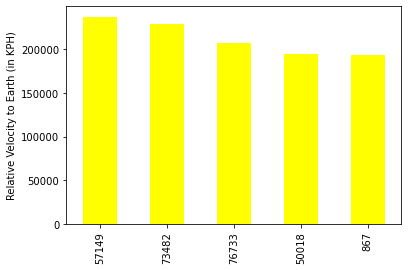

In [18]:
eda_rvL['relative_velocity'].plot(kind='bar', ylabel='Relative Velocity to Earth (in KPH)', color='yellow')

The fastest Asteroid (relative to Earth) is 2019 EJ3, where its velocity is a whopping 236000 kph. For the first time here, we can note the number 5 ranked Asteroid (in terms of relative velocity) does pose a threat to Earth. There is an assumption then that speed may affect such outcome.

In [19]:
# Top 5 Slowest Asteroids
eda_rvS = df.sort_values('relative_velocity', ascending=True).head(5)
eda_rvS

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
85033,54160402,(2021 LX6),0.092163,0.206082,203.346433,5.747823e+07,Earth,False,22.30,False
55221,2250162,250162 (2002 TY57),0.334622,0.748238,271.446828,4.963713e+07,Earth,False,19.50,False
50494,3788021,(2017 UB5),0.116026,0.259442,494.185355,4.455477e+07,Earth,False,21.80,False
9287,2213053,213053 (1998 WT30),0.306588,0.685551,561.695602,5.155971e+07,Earth,False,19.69,False
32614,2250162,250162 (2002 TY57),0.334622,0.748238,621.728965,4.811691e+07,Earth,False,19.50,False


<AxesSubplot:ylabel='Relative Velocity to Earth (in KPH)'>

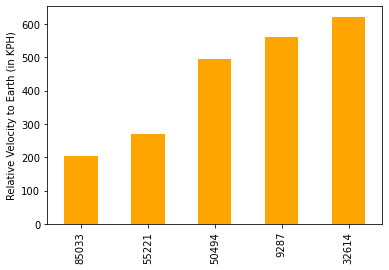

In [20]:
eda_rvS['relative_velocity'].plot(kind='bar', ylabel='Relative Velocity to Earth (in KPH)', color='orange')

The slowest Asteroid (relative to Earth) to ever be recorded is 2021 LX6, with a velocity of about 203 kph. In this case, none of the slowest Asteroids seem to pose a threat to Earth.

### d. Asteroid Miss Distance (to Earth)

The miss distance is defined as the distance in which an Asteroid's flight path passes the Earth.

In [21]:
# Top 5 Closest Asteroids
eda_mdS = df.sort_values('miss_distance', ascending=True).head(5)
eda_mdS

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
81361,54087809,(2020 VT4),0.004837,0.010815,48337.630377,6745.532516,Earth,False,28.70,False
79344,54051131,(2020 QG),0.002783,0.006224,44391.122303,9316.925424,Earth,False,29.90,False
87352,54212443,(2021 UA1),0.001139,0.002547,57006.024697,9426.685381,Earth,False,31.84,False
33866,3556206,(2011 CQ1),0.001011,0.002260,34896.385840,11851.666854,Earth,False,32.10,False
74788,3892165,(2019 UN13),0.001058,0.002366,46242.336196,12613.434168,Earth,False,32.00,False


<AxesSubplot:ylabel='Miss Distance (in KM)'>

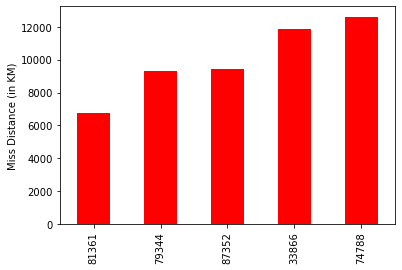

In [22]:
eda_mdS['miss_distance'].plot(kind='bar', ylabel='Miss Distance (in KM)', color='red')

The Asteroid to have been closest to Earth as it flew past is that named 2020 VT4. Its distance to Earth was only about 6745 km when it flew by. It is interesting to note that none of the 5 Asteroids, that have been the closest to Earth, were a threat to the planet.

In [23]:
# Top 5 Furthest Asteroids
eda_mdL = df.sort_values('miss_distance', ascending=False).head(5)
eda_mdL

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
64350,3702311,(2014 XD8),0.441118,0.986370,74389.977234,7.479865e+07,Earth,False,18.90,False
36044,3006207,(1995 HM),0.066766,0.149293,21230.091096,7.479655e+07,Earth,False,23.00,False
34811,2495316,495316 (2014 GD45),0.185590,0.414992,63375.140872,7.479530e+07,Earth,False,20.78,False
23872,3102731,(2002 AB2),0.057884,0.129431,74785.013572,7.479529e+07,Earth,False,23.31,False
19944,3638502,(2013 JE29),0.050881,0.113773,100204.195350,7.479223e+07,Earth,False,23.59,False


<AxesSubplot:ylabel='Miss Distance (in KM)'>

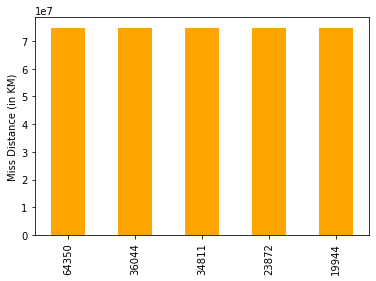

In [24]:
eda_mdL['miss_distance'].plot(kind='bar', ylabel='Miss Distance (in KM)', color='orange')

Asteroid 2014 XD8 is the furthest near Earth object to have been recorded, at about 7 million km miss distance. Here, the top 5 Asteroids (in terms of largest miss distance) did not pose a threat to Earth.

### e. Absolute Magnitude (Intrinsic Luminosity)

Absolute Magnitude describes the Intrinsic Luminosity of an Asteroud, where it is defined as the Total Energy Output by a said object measured in Watts Distance Independent. In simplistic terms, it can be termed as the "brightness" of the Asteroid.

Reference: https://bit.ly/3rdVukw

In [25]:
# Top 5 Brightest Asteroids
eda_amL = df.sort_values('absolute_magnitude', ascending=False).head(5)
eda_amL

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
24949,3430497,(2008 TS26),0.000609,0.001362,56751.017090,1.263816e+04,Earth,False,33.20,False
51038,54106298,(2021 BO),0.000683,0.001528,56370.197452,5.196340e+07,Earth,False,32.95,False
56366,54106298,(2021 BO),0.000683,0.001528,43432.989900,3.436341e+07,Earth,False,32.95,False
45661,54106298,(2021 BO),0.000683,0.001528,69293.963546,6.947159e+07,Earth,False,32.95,False
75986,54106298,(2021 BO),0.000683,0.001528,30725.628392,1.686312e+07,Earth,False,32.95,False


<AxesSubplot:ylabel='Absolute Magnitude (in Watts Distance)'>

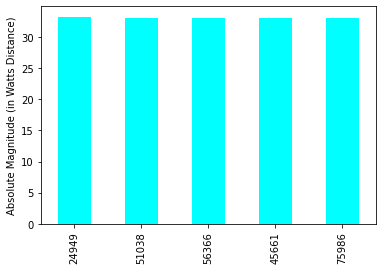

In [26]:
eda_amL['absolute_magnitude'].plot(kind='bar', ylabel='Absolute Magnitude (in Watts Distance)', color='aqua')

The brightest Asteroid to ever be recorded is that of 2008 TS26, which coincidentally is also our smallest Asteroid. Its absolute magnitude is 33.2 watts distance. The top 5 Asteroids here has generally similar absolute magnitude levels, hovering around 33 watts distance. None of them poses a threat to Earth. 

As an end note, the top 5 brightest Asteroid are also the top 5 smallest Asteroids. Therefore, we can assume that absolute magnitude may be inversely proportional to the diameter of an Asteroid. Inversely proportional means that when one value goes up, the other will go down.

In [27]:
# Top 5 Dimmest Asteroids
eda_amS = df.sort_values('absolute_magnitude', ascending=True).head(5)
eda_amS

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
36418,2001036,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,5.372124e+07,Earth,False,9.23,False
37651,2000433,433 Eros (A898 PA),23.043847,51.527608,21402.705247,2.672952e+07,Earth,False,10.31,False
12709,2000433,433 Eros (A898 PA),23.043847,51.527608,15884.252623,5.468808e+07,Earth,False,10.31,False
56533,2000433,433 Eros (A898 PA),23.043847,51.527608,21761.703426,3.120592e+07,Earth,False,10.31,False
16895,2001866,1866 Sisyphus (1972 XA),8.640820,19.321462,96530.774890,7.402691e+07,Earth,False,12.44,False


<AxesSubplot:ylabel='Absolute Magnitude (in Watts Distance)'>

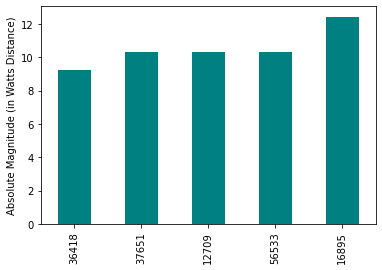

In [28]:
eda_amS['absolute_magnitude'].plot(kind='bar', ylabel='Absolute Magnitude (in Watts Distance)', color='teal')

The dimmest Asteroid to have been recorded is interestingly our largest Asteroid as well: 1036 Gaymed, at 9.23 Watts Distance. The top 5 dimmest Asteroids are also the top 5 largest ones. This reinforces the assumption that absolute magnitude indeed is inversely proportional to Asteroid diameter. 

### f. Notes for Orbiting Body and Sentry Object

As per the information from where the dataset has been obtained, the feature Orbiting Body is defined as the planet that the Asteroid orbits, in which case the unique value is only one; that of Earth. On the other hand, Sentry Object is used to state whether or not an Asteroid has been included in sentry: An automated collision monitoring system. It could only have two outputs: True or False. However, in our case, all the Asteroids in our data has not been included in the Sentry Object / are all "False."

As such, we will not be using or analyzing these features as it bears no weight to the decision-making process of the model later on. As an additional note, we will not be using the ID and Name of the Asteroids as features as well as they are only labels.

### g. Class Balance

Class Balance:  False    81996
True      8840
Name: hazardous, dtype: int64


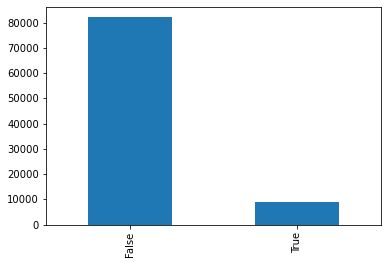

In [29]:
df['hazardous'].value_counts().plot(kind='bar')
print("Class Balance: ", df['hazardous'].value_counts())

The graph above describes that there is a Class Imbalance in the target of our dataset, where data entries for "False" is counted at 81996, whilst data entries for "True" is counted at only 8840.

Data Imbalance Interpretation:

- Ratio of 20 - 40% = Mild Imbalance 

- Ratio of 1 - 20% = Moderate Imbalance

- Ratio of Below 1% = Extreme Imbalance

Reference: https://bit.ly/3E2twQd

In [30]:
print(8840/(8840+81996)*100, '%')

9.731824386806993 %


In our case, the data entries for those with target outcome "True" (or Class 1) is only 9.73% of the dataset as a whole. Therefore, there is a moderate imbalance in our data.

### h. Merging Features - Estimated Minimum and Maximum Diameter

There is an opportunity here to merge two features, in which we can reduce load time and computer resource used. Therefore, we will be going ahead and combining the features of estimated minimum and maximum diameters together, in which it will become the estimated average diameter.

In [31]:
# Creating new feature "estimated average diameter" (est_diameter_avg) from finding the middle value of between the minimum and maximum estimated diameter.

df['est_diameter_avg'] = ((df['est_diameter_max']-df['est_diameter_min'])/2)+df['est_diameter_min']
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,est_diameter_avg
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,1.938843
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,0.430073
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,1.168268
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,0.156150
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,0.412613
...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False,0.043007
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False,0.027136
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False,0.051706
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False,0.011845


## V. Data Preprocessing

Data preprocessing is an important step in the model making process in which we prepare our data for model processing. Failure to do so will result in our model either performing poorly or fail to work completely. 

It is important to note that we will be using four models: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and K-Nearest Neighbours. As such, we will be preprocessing the data according the fulfillment of assumptions for these four models.

However, we can summarize with certainty that the Decision Tree and Random Forest models are not burdened with fulfilling assumptions, as they are robust models that do not require much or data preprocessing at all. On the other hand, K-Nearest Neighbours is a model that is sensitive to outliers. Therefore, we would need to handle such outliers. 

The Logistic Regression model would be one with the most assumptions to meet. In short, these are the requirements we need to fulfill in order for this model to work properly:

1. The target variable is binary - In our case, we have already ascertained that our target is binary.

2. It assumes the entries to be independent of each other (no duplicates) - We have checked and confirmed that there are no duplicates in our dataset.

3. There is a linear relationship between the independent variable (features) and dependent variable (target) - We will check this done later on.

4. It assumes that there is minimal or no multicollinearity among the independent variables (features) - We will check this done later on as well.

5. It usually requires a large sample size to predict properly - Most references assume a sample size of 500 and above as a fulfillment of the requirement. With a sample of about 90 thousand, we have fulfilled this requirement already.

As such, let us proceed with fulfilling requirements 3 and 4, as well as handling any outliers.

As an additional note, it is required for our model to be numerical in form before it can be inputted to our model. Therefore, Feature Encoding may be necessary. However, following the EDA above, we can conclude that we will not be using any non-numerical features, which would mean that we will skip this step. Feature Scaling is also preferred for our model to understand the data with ease. Lastly, seeing how there is a class imbalance in our target output (as seen in the Exploratory Data Analysis), we will be balancing our dataset to prevent poor model output / reduce errors.

References: https://bit.ly/3SFtstP & https://bit.ly/3E20v7i

### a. Feature Selection

Feature selection is a process in which features are chosen based on specific assumptions. The reasoning behind this step is as to lessen the load on computer resources and time when it comes to the creation of our model. 

In [32]:
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
est_diameter_avg      float64
dtype: object

Understanding already that we can drop certain features as well as our labels, we will proceed with doing so below.

In [33]:
# Defining new dataset in which only certain features and our target is retained.
df1 = df.drop(['id', 'name', 'est_diameter_min', 'est_diameter_max', 'orbiting_body', 'sentry_object'], axis=1) 

#### 1. Checking Correlation of Features to Target (Logistic Regression - Requirement 3)

We will be conducting a Chi-Square test with a K-Feature value output as well as using a Phik Matrix to find the magnitude of correlation of our features to our target.

In [34]:
# Splitting features from target "hazardous."
df_chiN= df1.drop(['hazardous'], axis=1) 
df_targ = df[['hazardous']]

In [35]:
# Chi-Square test syntax.
chi_num = SelectKBest(score_func=chi2, k='all')
fit_num = chi_num.fit(df_chiN, df_targ)
fit_num.scores_

array([4.41900556e+07, 2.19091335e+09, 4.31447150e+03, 3.45547539e+03])

In [36]:
# Rounding of results, which come out as K-Feature values.
np.round_(fit_num.scores_)

array([4.41900560e+07, 2.19091335e+09, 4.31400000e+03, 3.45500000e+03])

In [37]:
# Fitting (selecting) the rounded K-Feature values and sorting them.
chi_n = pd.Series((fit_num.scores_))
chi_n.index = df_chiN.columns
chi_n.sort_values(ascending=False)

miss_distance         2.190913e+09
relative_velocity     4.419006e+07
absolute_magnitude    4.314471e+03
est_diameter_avg      3.455475e+03
dtype: float64

The Chi-Square test indicates that all our features have a correlation to our target. As such, we are unable to use this method to definitely ascertain which features to retain and/or drop.

interval columns not set, guessing: ['relative_velocity', 'miss_distance', 'absolute_magnitude', 'est_diameter_avg']


<AxesSubplot:>

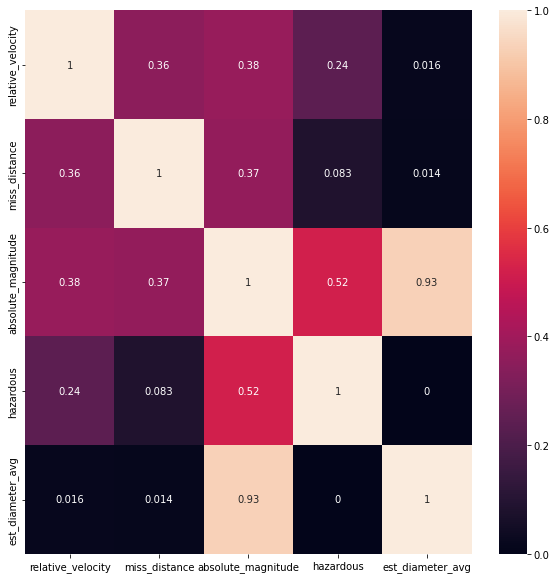

In [38]:
# Spawning of Phik Matrix.
plt.figure(figsize=(10, 10)) # Figure size.
sns.heatmap(df1.phik_matrix(), vmin = 0, vmax = 1, annot = True) # In this case, our range for the correlation coefficient is 0 to 1.

The Phik Matrix is a useful tool to check any correlation between our features to the target. Its output coefficient value only ranges from 0 to 1, where the interpretation is as follows:

- Correlation coefficients between 0.9 and 1.0 = Very high correlation
- Correlation coefficients between 0.7 and 0.9 = High correlation
- Correlation coefficients between 0.5 and 0.7 = Moderate correlation
- Correlation coefficients between 0.3 and 0.5 = Low correlation
- Correlation coefficients below 0.3 = Weak to no correlation

Reference: https://bit.ly/3f1UPQh

In conclusion then, we would like to retain features that have a correlation coefficient of 0.3 or above. Looking at the hazardous row, we could ascertain which of these features are included. As such, it would seem that only absolute_magnitude is the feature with correlation to our target.

In truth, the retaining / selection of features to be used in our model could stem from having our own assumptions. To clarify, this would mean that we could choose to retain any features we want regardless of what the Chi-Square test and Phik Matrix describes to us. As a reminder, the dropping of features is done solely for the purpose of reducing load times and computer resources. Since our dataset contains little number of features (only four), it will be decided that we will be retaining all our features here, regardless of whether they have correlation to the target or not.

#### 2. Checking Multicollinearity (Logistic Regression - Requirement 4)

We will be using the Variance Inflation Factor (VIF) test to determine whether our features have multicollinearity. Multicollinearity is defined as a state in which our features have a correlation towards each other. 

In [39]:
# Outputting name of our columns into array.
df1.columns

Index(['relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous',
       'est_diameter_avg'],
      dtype='object')

In [40]:
# Checking Variance Inflation Factor (VIF)
vif_test = df1[['relative_velocity', 'miss_distance', 'absolute_magnitude', 'est_diameter_avg']] # Defining vif_test.
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns # Creating column "Feature" in vif_data where it is equal to the entries in vif_test.

# Creating column "VIF" in vif_data where it is equal to the VIF values of each columns in vif_test.
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))]
  
print(vif_data) # Printing of output.

              Feature       VIF
0   relative_velocity  4.977891
1       miss_distance  4.070907
2  absolute_magnitude  4.679218
3    est_diameter_avg  1.280775


The Logistic Regression model requires that the features used have no correlation to each other. However, moderately correlation is still considered acceptable. The VIF score is interpreted as follows:

- 1 = Not correlated
- 1 to 10 = Moderately correlated
- More than 10 = Highly correlated

Reference: https://bit.ly/3f54fdK

To summarize, since all our features have a VIF score of below 10, we can retain them all.

### b. Splitting Dataset

In [41]:
X = df1.drop(['hazardous'], axis=1) 
y = df1['hazardous']

# Splitting dataframe between Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.7)

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_Train Size : ', y_train.shape)
print('y_Test Size  : ', y_test.shape)

X_Train Size :  (63585, 4)
X_Test Size  :  (27251, 4)
y_Train Size :  (63585,)
y_Test Size  :  (27251,)


It is important to split our dataset into a train and test set, in which our model will be learning the patterns in our train set, and make predictions using our test set. Crucially, this step is done as early as possible to prevent data leakage. This would mean that we are trying to prevent our model from "taking a peak" at the pattern of test data before it is inputted into it. If data leakage were to happen, then our model would falsely be accurate in its predictions. In this situation, our model would be poor in making predictions when it is inputted with live data, even though it has performed well in our train and test sets.

The splitting of our features from our target is done solely because it is a requirement as an input into our models. Without doing so, our models would not function.

### c. Dataset Balancing

To reduce errors and poor model predictions, we will be balancing our dataset. To clarify, this would mean that we will be balancing the number of data entries that have the outcome "False" in our target column of "hazardous", with the number of data entries that have the outcome "True" in our target column.

we will be undersampling our majority class (that of the "False" category) and set its sample number to that of our minority class (that of the "True" category). This is done so that we could use real data entries, instead of synthesizing / creating new data entries of our own that are similar to that of our original dataset. 

*Note that only our train sets will be balanced as we aim to keep the test set as close as possible to the original dataset to accurately evaluate the performance of our models.

In [42]:
# Defining balancer. 
nm = NearMiss()

In [43]:
# Fitting and resampling dataset.
X_train_miss, y_train_miss = nm.fit_resample(X_train, y_train)

Class Balance:  False    6188
True     6188
Name: hazardous, dtype: int64


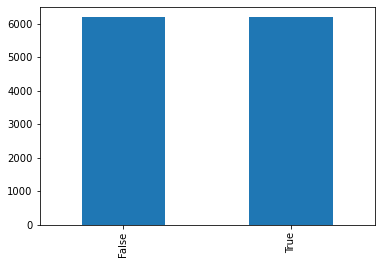

In [44]:
# Displaying bar graph.
y_train_miss.value_counts().plot(kind='bar')
print("Class Balance: ", y_train_miss.value_counts())

We can confirm that our majority class have been undersampled and reduced to the same count as our minority class at 6183 samples.

### d. Outlier Handling

Outlier handling is done as we have two models that are sensitive to outliers, namely Logistic Regression and K-Nearest Neighbors.

In [45]:
# Function to create histogram and boxplot.

def diagnostic_plots(X_train_miss, variable):
    # Defining Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_miss[variable], bins=30) # This syntax takes the specific columns for a dataframe into the graph.
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(X_train_miss[variable])
    plt.title('Boxplot')

    plt.show() # Displaying Plot

    # Skewness
    print('\nSkewness Value : ', X_train_miss[variable].skew())

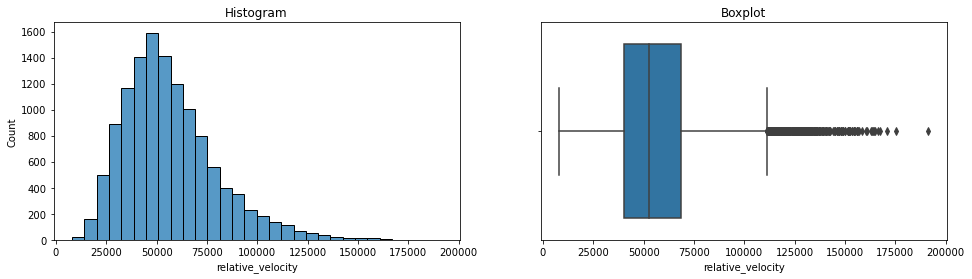


Skewness Value :  1.0565648520944158


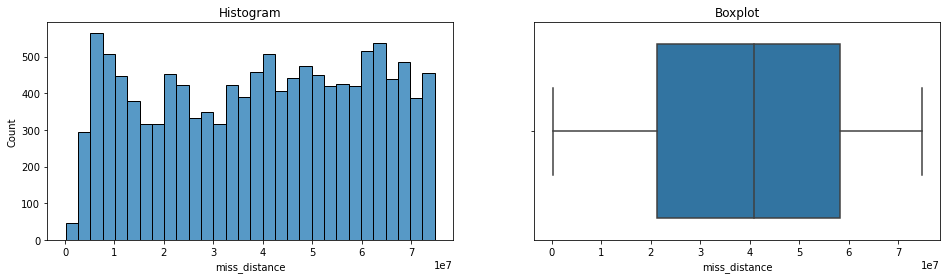


Skewness Value :  -0.09295930586984547


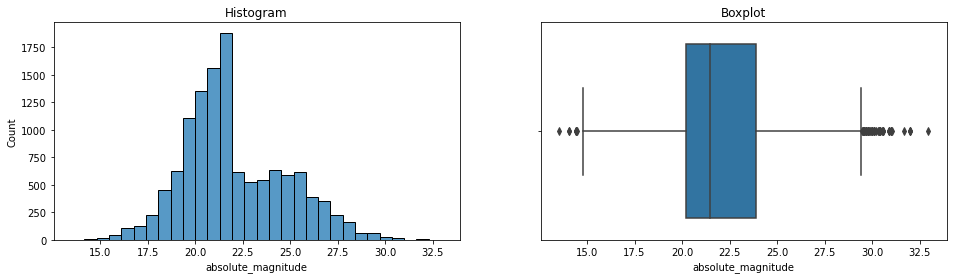


Skewness Value :  0.5072660545689798


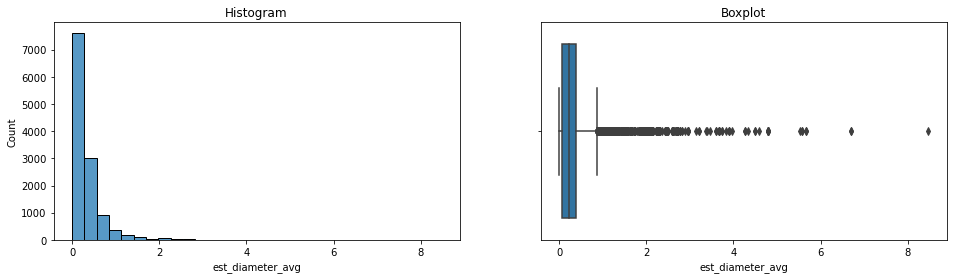


Skewness Value :  5.125993621081143


In [46]:
# For loop to create visualization for all features.
for variable in X_train_miss.columns:
    diagnostic_plots(X_train_miss,variable)

Only the skewness value is used to ascertain whether or not a feature has skewed data or not. The interpretation of its values is as follows:

- 0 to 0.5 or 0 to -0.5 = Normally Distributed
- 0.5 to 1 or -0.5 to -1 = Moderately Skewed
- Beyond 1 or -1 = Highly Skewed

*Positive values indicates direction to the right whilst negative values indicates direction to the left.

Here, we can summarize that only the features "relative_velocity" and "est_diameter_avg" is skewed (they are both highly skewed to the right). Therefore, we would only be handling them. We will be using capping / censoring (also called Winsorizing) to preserve more of the trend of our original dataset.

Capping works by replacing the values of our outliers with that of the value of our boundaries.

In [47]:
# Handling outlier with capping / censoring.
windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=3, # Using fold 3 since features being capped are all heavily skewed.
                          variables=['relative_velocity', 'est_diameter_avg'])

# Fitting our dataset to the capper / windsorizer.
windsoriser.fit(X_train_miss)

# Transforming dataset and defining into new dataset.
X_train_final = windsoriser.transform(X_train_miss)

In [48]:
# Rechecking the skewness of our features after capping.
X_train_final.skew()

relative_velocity     1.027951
miss_distance        -0.092959
absolute_magnitude    0.507266
est_diameter_avg      1.792953
dtype: float64

The two features that we have capped are still heavily skewed, although their skewness have been significantly reduced. We must note that the process of handling outliers is not for the purpose of making our dataset normally distributed, but only to reduce the magnitude of the skewness. Therefore, we will proceed.

### e. Feature Scaling

Feature scaling is another important step in allowing our models to interpret the data with ease as it limits the range of the values of our data entries. Here, we will be Normalizing our values / using Min-Max Scaler since this is the preffered scaler for datasets that have skewed / not normally distributed data.

In [49]:
# Defining scaler.
scaler = MinMaxScaler()

# Fitting features to be scaled. We are only fitting the train set and will be scaling the test set according to it.
scaler.fit(X_train_final)

# Scaling features.
X_train_scaled = scaler.transform(X_train_final)
X_test_scaled = scaler.transform(X_test)

## VI. Model Definition

We now move into the first process in creating our model: Defining the model and choosing its hyperparameters.

### a. Logistic Regression

In [50]:
# Defining Logistic Regression Model.
log_model1 = LogisticRegression(C = 1, penalty = 'l2', solver = 'newton-cg')

In [51]:
# Defining X_train, X_test, y_train, and y_test for Logistic Regression model.
X_train_log1 = X_train_scaled
X_test_log1 = X_test_scaled
y_train_log1 = y_train_miss
y_test_log1 = y_test

### b. Decision Tree

In [52]:
# Defining Decision Tree model. We are using random_state=0 here to prevent changes in output when the code is re-runned.
tree_clf1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_features = 'sqrt', random_state=0)

In [53]:
# Defining X_train, X_test, y_train, and y_test for Decision Tree model.
X_train_tree1 = X_train_scaled
X_test_tree1 = X_test_scaled
y_train_tree1 = y_train_miss
y_test_tree1 = y_test

### c. Random Forest

In [54]:
# Defining Random Tree model. We are using random_state=0 here to prevent changes in output when the code is re-runned.
rnd_clf1 = RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 'sqrt', random_state=0)

In [55]:
# Defining X_train, X_test, y_train, and y_test for Random Forest model.
X_train_rnd1 = X_train_scaled
X_test_rnd1 = X_test_scaled
y_train_rnd1 = y_train_miss
y_test_rnd1 = y_test

### d. Logistic Regression

In [56]:
# Defining KNN model.
neigh1 = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 20, n_neighbors = 7)

In [57]:
# Defining X_train, X_test, y_train, and y_test for K-Nearest Neighbours model.
X_train_neigh1 = X_train_scaled
X_test_neigh1 = X_test_scaled
y_train_neigh1 = y_train_miss
y_test_neigh1 = y_test

## VII. Model Training

### a. Logistic Regression

In [58]:
# Training Logistic Regression model.
log_model1.fit(X_train_log1, y_train_log1)

LogisticRegression(C=1, solver='newton-cg')

### b. Decision Tree

In [59]:
tree_clf1.fit(X_train_tree1, y_train_tree1)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=0)

### c. Random Forest

In [60]:
rnd_clf1.fit(X_train_rnd1, y_train_rnd1)

RandomForestClassifier(max_depth=5, random_state=0)

### d. Logistic Regression

In [61]:
neigh1.fit(X_train_neigh1, y_train_neigh1)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=7)

## VIII. Model Evaluation

### a. Logistic Regression

Model Evaluation is an important step in ascertaining the performance of our models. Information from here could be used to reevaluate our Pre-Processing step, tweak hyperparameters, or even change models if our current ones perform poorly.

In [62]:
# Ascertaining the probability of where our predicted outcome will land on (False or True) using predict_proba.
y_train_log_prob1 = log_model1.predict_proba(X_train_log1)
y_test_log_prob1 = log_model1.predict_proba(X_test_log1)

There are two output for each data entry in predict_proba, one for probability that outcome will be False, and the other probability it will be True. Both outputs are in percentages.

Reference: https://bit.ly/3SjoVgG

In [63]:
# Ascertaining the probability of where our predicted outcome will land on (False or True) using predict.
y_pred_train_log1 = log_model1.predict(X_train_log1)
y_pred_test_log1 = log_model1.predict(X_test_log1)

Similar to predict_proba, the syntax above is used to find the outcome of our prediction for each data entry (output will be either False or True).

Reference: https://bit.ly/3S0osjF

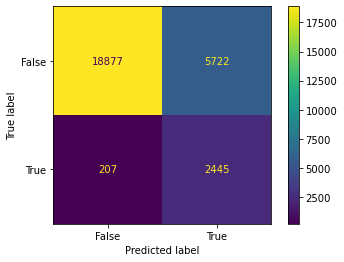

In [64]:
# Spawning Confusion Matrix
cm_log1 = confusion_matrix(y_test_log1, y_pred_test_log1, labels=log_model1.classes_)
disp_log1 = ConfusionMatrixDisplay(confusion_matrix=cm_log1,display_labels=log_model1.classes_)

disp_log1.plot()
plt.show()

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. 

Here, we can conclude that the Logistic Regression model has a predicting outcome of 18877 True Negatives (False), 2445 True Positives (True), and a False Negative and False Positive of 207 and 5722 respectively.

In [65]:
print(classification_report(y_train_log1,y_pred_train_log1))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_log1, y_train_log_prob1[:,1]))

              precision    recall  f1-score   support

       False       0.93      0.75      0.83      6188
        True       0.79      0.95      0.86      6188

    accuracy                           0.85     12376
   macro avg       0.86      0.85      0.85     12376
weighted avg       0.86      0.85      0.85     12376

Train ROC-AUC Score:  0.8846099786938794


The Classification Report is a useful tool to evaluate the performance of our models and has numerous information that may be crucial to us. However, it is important to understand that we will be only looking at certain aspects of this report in accordance to the context to our problem and/or needs. Therefore, we will need to define scenarios that is relevant to our case.

From the beginning of this notebook, we could understand that the purpose of creating our model is to predict whether or not an Asteroid is a threat to Earth. As such, it is important for our model NOT to mistakenly think that an Asteroid is NOT A THREAT when in fact IT IS. Furthermore, although not as crucial, having our model predict that an Asteroid is A THREAT when in fact IT IS NOT could also have some ramifications in terms of time and resources wasted. Therefore, we could conclude the following scenarios:

- Model predicts Asteroid is a NOT A THREAT when in fact IT IS (False Negative)
- Model predicts Asteroid is a THREAT when in fact it is NOT (False Positive)

With this, we will only be looking at the attribute "Recall."

Recall Interpretation:

- The closer the Recall is to 1, the lesser the False Negative is.

There are two versions of Recall, and we will be noting this in accordance to our case:

- Recall Class 0 = Where False Negative means that model predicts Asteroid as A THREAT when it is NOT.

- Recall Class 1 = Where False Negative means that model predicts Asteroid as NOT A THREAT when IT IS.

It is important to note that we will only be looking at our Test Set for the evaluation.

*Additional Notes:

- Support describes the number of entries in each class.
- The Accuracy is defined as a ratio of correctly predicted observation to the total observations. It is used only when there is a balance between classes in our dataset. Since our Test Set is imbalanced, we will not be using accuracy.
- The ROC-AUC Score in our case would only be used to ascertain the fit of our model.

In [66]:
print(classification_report(y_test_log1,y_pred_test_log1))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_log1, y_test_log_prob1[:,1]))

              precision    recall  f1-score   support

       False       0.99      0.77      0.86     24599
        True       0.30      0.92      0.45      2652

    accuracy                           0.78     27251
   macro avg       0.64      0.84      0.66     27251
weighted avg       0.92      0.78      0.82     27251

Test ROC-AUC Score:  0.8740543720982907


Logistic Regression Model Test Set Overview:

- Class 0 Recall is 0.77 / 77%
- Class 1 Recall is 0.92 / 92%
- Model is just-fit

Summary:

Class 0's recall score indicates to us that the model is 77% accurate at classifying Asteroids as not hazardous / not a threat. This means that 23% of the time, we may get a false alarm that may provide varying degrees of consequences, mostly resource wise. However, these consequences are relatively small in the grand scheme of things.

For Class 1, we have a relatively good recall at 92%, which would indicate that our model is great at accurately classifying Asteroids as hazardous / a threat. With it, we may have little risk of an incoming Asteroid being unmonitored and hitting planet Earth.

ROC-AUC score of 87% for Train Set and 87% for Test Set. Assuming that range of 1% determines if model is fit, then we can conclude that this model is just-fit.

### b. Decision Tree

In [67]:
y_train_tree_prob1 = tree_clf1.predict_proba(X_train_tree1)
y_test_tree_prob1 = tree_clf1.predict_proba(X_test_tree1)

In [68]:
y_pred_train_tree1 = tree_clf1.predict(X_train_tree1)
y_pred_test_tree1 = tree_clf1.predict(X_test_tree1)

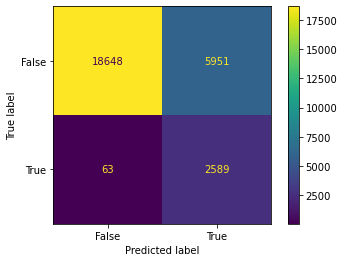

In [69]:
cm_tree1 = confusion_matrix(y_test_tree1, y_pred_test_tree1, labels=tree_clf1.classes_)
disp_tree1 = ConfusionMatrixDisplay(confusion_matrix=cm_tree1,display_labels=tree_clf1.classes_)

disp_tree1.plot()
plt.show()

The Decision Tree model has a predicting outcome of 18648 True Negatives (False), 2589 True Positives (True), and a False Negative and False Positive of 63 and 5951 respectively.

In [70]:
print(classification_report(y_train_tree1,y_pred_train_tree1))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_tree1, y_train_tree_prob1[:,1]))

              precision    recall  f1-score   support

       False       0.99      0.77      0.87      6188
        True       0.81      0.99      0.89      6188

    accuracy                           0.88     12376
   macro avg       0.90      0.88      0.88     12376
weighted avg       0.90      0.88      0.88     12376

Train ROC-AUC Score:  0.9432977463522827


In [71]:
print(classification_report(y_test_tree1,y_pred_test_tree1))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_tree1, y_test_tree_prob1[:,1]))

              precision    recall  f1-score   support

       False       1.00      0.76      0.86     24599
        True       0.30      0.98      0.46      2652

    accuracy                           0.78     27251
   macro avg       0.65      0.87      0.66     27251
weighted avg       0.93      0.78      0.82     27251

Test ROC-AUC Score:  0.8799101003934175


Decision Tree Model Test Set Overview:

- Class 0 Recall is 0.76 / 76%
- Class 1 Recall is 0.98 / 98%
- Model is overfit

Summary:

The recall of Class 0 is at 76%, which indicates to us that the model is quite accurate at classifying Asteroids as not hazardous / not a threat. However, 24% of the time, we may get a false alarm that may or may not have consequences.

The recall for Class 1 is high, at 98%. This indicates that our model is superb at accurately classifying Asteroids as hazardous / a threat. With it, we have minimal risk of an incoming Asteroid being unmonitored and hitting the planet.

ROC-AUC score of 94% for Train Set and 88% for Test Set. With this, we can conclude that this model is overfit.

### c. Random Forest

In [72]:
y_train_rnd_prob1 = rnd_clf1.predict_proba(X_train_rnd1)
y_test_rnd_prob1 = rnd_clf1.predict_proba(X_test_rnd1)

In [73]:
y_pred_train_rnd1 = rnd_clf1.predict(X_train_rnd1)
y_pred_test_rnd1 = rnd_clf1.predict(X_test_rnd1)

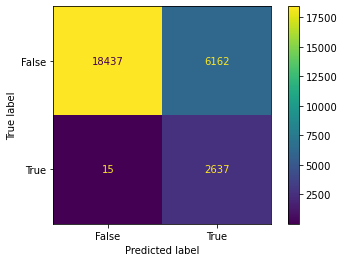

In [74]:
cm_rnd1 = confusion_matrix(y_test_rnd1, y_pred_test_rnd1, labels=rnd_clf1.classes_)
disp_rnd1 = ConfusionMatrixDisplay(confusion_matrix=cm_rnd1,display_labels=rnd_clf1.classes_)

disp_rnd1.plot()
plt.show()

The Random Forest model has a predicting outcome of 18437 True Negatives (False), 2637 True Positives (True), and a False Negative and False Positive of 15 and 6162 respectively.

In [75]:
print(classification_report(y_train_rnd1,y_pred_train_rnd1))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_rnd1, y_train_rnd_prob1[:,1]))

              precision    recall  f1-score   support

       False       0.99      0.75      0.85      6188
        True       0.80      1.00      0.89      6188

    accuracy                           0.87     12376
   macro avg       0.90      0.87      0.87     12376
weighted avg       0.90      0.87      0.87     12376

Train ROC-AUC Score:  0.931740343196102


In [76]:
print(classification_report(y_test_rnd1,y_pred_test_rnd1))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_rnd1, y_test_rnd_prob1[:,1]))

              precision    recall  f1-score   support

       False       1.00      0.75      0.86     24599
        True       0.30      0.99      0.46      2652

    accuracy                           0.77     27251
   macro avg       0.65      0.87      0.66     27251
weighted avg       0.93      0.77      0.82     27251

Test ROC-AUC Score:  0.89369203747568


Random Forest Model Test Set Overview:

- Class 0 Recall is 0.75 / 75%
- Class 1 Recall is 0.99 / 99%
- Model is overfit

Summary:

Class 0 recall stands at 75%, which indicates to us that the model is quite accurate at classifying Asteroids as not hazardous / not a threat. However, 25% of the time, it may provide us with a false alarm which may or may not have consequences.

Class 1 is at 99%. This indicates that our model is perfect at accurately classifying Asteroids as hazardous / a threat. The risk of an unmonitored Asteroid hitting Earth is therefore almost nullified.

ROC-AUC score of 93% for Train Set and 89% for Test Set. We can conclude that this model is overfit.

### d. K-Nearest Neighbours

In [77]:
y_train_neigh_prob1 = neigh1.predict_proba(X_train_neigh1)
y_test_neigh_prob1 = neigh1.predict_proba(X_test_neigh1)

In [78]:
y_pred_train_neigh1 = neigh1.predict(X_train_neigh1)
y_pred_test_neigh1 = neigh1.predict(X_test_neigh1)

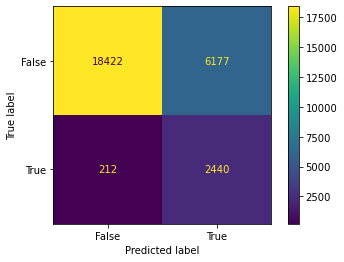

In [79]:
cm_neigh1 = confusion_matrix(y_test_neigh1, y_pred_test_neigh1, labels=neigh1.classes_)
disp_neigh1 = ConfusionMatrixDisplay(confusion_matrix=cm_neigh1,display_labels=neigh1.classes_)

disp_neigh1.plot()
plt.show()

The K-Nearest Neighbours model has a predicting outcome of 18422 True Negatives (False), 2440 True Positives (True), and a False Negative and False Positive of 212 and 6177 respectively.

In [80]:
print(classification_report(y_train_neigh1,y_pred_train_neigh1))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_neigh1, y_train_neigh_prob1[:,1]))

              precision    recall  f1-score   support

       False       0.95      0.80      0.87      6188
        True       0.83      0.96      0.89      6188

    accuracy                           0.88     12376
   macro avg       0.89      0.88      0.88     12376
weighted avg       0.89      0.88      0.88     12376

Train ROC-AUC Score:  0.9539047780615901


In [81]:
print(classification_report(y_test_neigh1,y_pred_test_neigh1))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_neigh1, y_test_neigh_prob1[:,1]))

              precision    recall  f1-score   support

       False       0.99      0.75      0.85     24599
        True       0.28      0.92      0.43      2652

    accuracy                           0.77     27251
   macro avg       0.64      0.83      0.64     27251
weighted avg       0.92      0.77      0.81     27251

Test ROC-AUC Score:  0.8745274198138137


K-Nearest Neighbours Model Test Set Overview:

- Class 0 Recall is 0.75 / 75%
- Class 1 Recall is 0.92 / 92%
- Model is overfit

Summary:

Class 0 recall stands at 75%. This indicates that the model is quite accurate at classifying Asteroids as not hazardous / not a threat. However, it may provide us with a false alarm 25% of the time, which may or may not have consequences.

Class 1 is high at 92%. This indicates that our model is excellent at accurately classifying Asteroids as hazardous / a threat. The risk of having an unmonitored Asteroid hitting planet Earth is then minimized.

ROC-AUC score of 95% for Train Set and 88% for Test Set. Thus, this model is overfit.

## IX. Model Improvement

### a. Grid Search Cross-Validation and Model Definition

We will now be using GridSearchCV to find the optimal hyperparameters and improve each of our models. Note that GridSearchCV would only find optimal hyperparameters at a given range that we will manually input. It will not look for best hyperparameters across an infinite range of posibilities. This, in short, can prove to be a slight disadvantage.

#### 1. Logistic Regression

In [82]:
# Defining X_train, X_test, y_train, and y_test for Logistic Regression model.
X_train_log = X_train_scaled
X_test_log = X_test_scaled
y_train_log = y_train_miss
y_test_log = y_test

In [83]:
# Grid Search Cross-Validation (GridSearchCV)

# Parameters to be tested. Reference: https://bit.ly/3Rr9xxM
param_grid_log = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],  'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'C' : [0.001, 0.01, 0.1, 1, 2, 5]}

# Defining Model to be used.
log_gridcv = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_log, n_jobs=-1)

# Training dataset.
log_gridcv.fit(X_train_log, y_train_log)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [84]:
# Printing best hyperparameters.
print(log_gridcv.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [85]:
# Defining Logistic Regression Model with best hyperparameters.
log_model = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')

#### 2. Decision Tree

In [93]:
# Defining X_train, X_test, y_train, and y_test for Decision Tree model.
X_train_tree = X_train_scaled
X_test_tree  = X_test_scaled
y_train_tree  = y_train_miss
y_test_tree = y_test

In [94]:
# Parameters to be tested. Reference: https://bit.ly/3f281ol
param_grid_tree = {'criterion' : ['gini', 'entropy', 'log_loss'], 'max_depth': [10, 20, 50, 70, 100], 'max_features' : ['auto', 'sqrt', 'log2']}

# Defining Model to be used.
tree_gridcv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_tree, n_jobs=-1)

# Training dataset.
tree_gridcv.fit(X_train_tree, y_train_tree)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 50, 70, 100],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [95]:
# Printing best hyperparameters.
print(tree_gridcv.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}


In [96]:
# Defining Decision Tree model with best hyperparameters. We are using random_state=0 here to prevent changes in output when the code is re-runned.
tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', random_state=0)

#### 3. Random Forest

In [97]:
# Defining X_train, X_test, y_train, and y_test for Random Forest model.
X_train_rnd = X_train_scaled
X_test_rnd  = X_test_scaled
y_train_rnd  = y_train_miss
y_test_rnd = y_test

In [98]:
# Parameters to be tested. Reference: https://bit.ly/3S5AHLS
param_grid_rnd = {'criterion' : ['gini', 'entropy', 'log_loss'], 'max_depth': [2, 5, 10, 20, 50], 'max_features' : ['sqrt', 'log2']}

# Defining Model to be used.
rnd_gridcv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rnd, n_jobs=-1)

# Training dataset.
rnd_gridcv.fit(X_train_rnd, y_train_rnd)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 10, 20, 50],
                         'max_features': ['sqrt', 'log2']})

In [100]:
# Printing best hyperparameters.
print(rnd_gridcv.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}


In [101]:
# Defining Random Tree model with best hyperparameters. We are using random_state=0 here to prevent changes in output when the code is re-runned.
rnd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', random_state=0)

#### 4. K-Nearest Neighbors (KNN)

In [102]:
# Defining X_train, X_test, y_train, and y_test for KNN model.
X_train_neigh = X_train_scaled
X_test_neigh  = X_test_scaled
y_train_neigh  = y_train_miss
y_test_neigh = y_test

In [103]:
# Parameters to be tested. Reference: https://bit.ly/3fuQvcI
param_grid_neigh = {'n_neighbors' : [2, 5, 7, 10, 20], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size' : [10, 20, 30, 40, 50]}

# Defining Model to be used.
neigh_gridcv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_neigh, n_jobs=-1)

# Training dataset.
neigh_gridcv.fit(X_train_neigh, y_train_neigh)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 5, 7, 10, 20]})

In [104]:
# Printing best hyperparameters.
print(neigh_gridcv.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 20}


In [105]:
# Defining KNN model with best hyperparameters.
neigh = KNeighborsClassifier(algorithm = 'auto', leaf_size = 10, n_neighbors = 20)

### b. Model Training (Improved Model)

We will now allow our models to study the train sets.

#### 1. Logistic Regression

In [401]:
# Training Logistic Regression model.
log_model.fit(X_train_log, y_train_log)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

#### 2. Decision Tree

In [107]:
tree_clf.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       random_state=0)

#### 3. Random Forest

In [106]:
rnd_clf.fit(X_train_rnd, y_train_rnd)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=0)

#### 4. K-Nearest Neighbors (KNN)

In [404]:
neigh.fit(X_train_neigh, y_train_neigh)

KNeighborsClassifier(leaf_size=10, n_neighbors=20)

### c. Model Evaluation (Improved Model)

#### 1. Logistic Regression

In [405]:
# Ascertaining the probability of where our predicted outcome will land on (False or True) using predict_proba.
y_train_log_prob = log_model.predict_proba(X_train_log)
y_test_log_prob = log_model.predict_proba(X_test_log)

In [406]:
# Ascertaining the probability of where our predicted outcome will land on (False or True) using predict.
y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

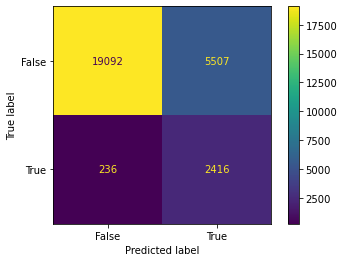

In [407]:
# Spawning Confusion Matrix
cm_log = confusion_matrix(y_test_log, y_pred_test_log, labels=log_model.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=log_model.classes_)

disp_log.plot()
plt.show()

Here, we can conclude that the Logistic Regression model has a predicting outcome of 19092 True Negatives (False), 2416 True Positives (True), and a False Negative and False Positive of 236 and 5507 respectively.

In [408]:
print(classification_report(y_train_log,y_pred_train_log))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_log, y_train_log_prob[:,1]))

              precision    recall  f1-score   support

       False       0.94      0.74      0.83      6188
        True       0.79      0.96      0.86      6188

    accuracy                           0.85     12376
   macro avg       0.87      0.85      0.85     12376
weighted avg       0.87      0.85      0.85     12376

Train ROC-AUC Score:  0.8768547795031689


In [409]:
print(classification_report(y_test_log,y_pred_test_log))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_log, y_test_log_prob[:,1]))

              precision    recall  f1-score   support

       False       0.99      0.78      0.87     24599
        True       0.30      0.91      0.46      2652

    accuracy                           0.79     27251
   macro avg       0.65      0.84      0.66     27251
weighted avg       0.92      0.79      0.83     27251

Test ROC-AUC Score:  0.8736572174235828


Logistic Regression Model (Improved) Test Set Overview:

- Class 0 Recall is 0.78 / 78%
- Class 1 Recall is 0.91 / 91%
- Model is just-fit

Summary:

Class 0's recall score indicates to us that the model is 78% accurate at classifying Asteroids as not hazardous / not a threat. This means that 22% of the time, we may get a false alarm that may provide varying degrees of consequences, mostly resource wise. However, these consequences are relatively small in the grand scheme of things.

For Class 1, we have a relatively good recall at 91%, which would indicate that our model is great at accurately classifying Asteroids as hazardous / a threat. With it, we may have little risk of an incoming Asteroid being unmonitored and hitting planet Earth.

ROC-AUC score of 88% for Train Set and 87% for Test Set. Assuming that range of 1% determines if model is fit, then we can conclude that this model is just-fit.

#### 2. Decision Tree

In [108]:
y_train_tree_prob = tree_clf.predict_proba(X_train_tree)
y_test_tree_prob = tree_clf.predict_proba(X_test_tree)

In [109]:
y_pred_train_tree = tree_clf.predict(X_train_tree)
y_pred_test_tree = tree_clf.predict(X_test_tree)

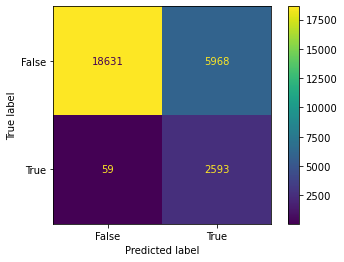

In [110]:
cm_tree = confusion_matrix(y_test_tree, y_pred_test_tree, labels=tree_clf.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=tree_clf.classes_)

disp_tree.plot()
plt.show()

The Decision Tree model has a predicting outcome of 18631 True Negatives (False), 2593 True Positives (True), and a False Negative and False Positive of 59 and 5968 respectively.

In [111]:
print(classification_report(y_train_tree,y_pred_train_tree))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_tree, y_train_tree_prob[:,1]))

              precision    recall  f1-score   support

       False       0.99      0.77      0.87      6188
        True       0.81      0.99      0.89      6188

    accuracy                           0.88     12376
   macro avg       0.90      0.88      0.88     12376
weighted avg       0.90      0.88      0.88     12376

Train ROC-AUC Score:  0.9416596085005531


In [112]:
print(classification_report(y_test_tree,y_pred_test_tree))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_tree, y_test_tree_prob[:,1]))

              precision    recall  f1-score   support

       False       1.00      0.76      0.86     24599
        True       0.30      0.98      0.46      2652

    accuracy                           0.78     27251
   macro avg       0.65      0.87      0.66     27251
weighted avg       0.93      0.78      0.82     27251

Test ROC-AUC Score:  0.882764589260609


Decision Tree Model (Improved) Test Set Overview:

- Class 0 Recall is 0.76 / 76%
- Class 1 Recall is 0.98 / 98%
- Model is overfit

Summary:

The recall of Class 0 is at 76%, which indicates to us that the model is quite accurate at classifying Asteroids as not hazardous / not a threat. However, 24% of the time, we may get a false alarm that may or may not have consequences.

The recall for Class 1 is very high, at 98%. This indicates that our model is superb at accurately classifying Asteroids as hazardous / a threat. With it, we have minimal risk of an incoming Asteroid being unmonitored and hitting the planet.

ROC-AUC score of 94% for Train Set and 88% for Test Set. With this, we can conclude that this model is overfit.

#### 3. Random Forest

In [113]:
y_train_rnd_prob = rnd_clf.predict_proba(X_train_rnd)
y_test_rnd_prob = rnd_clf.predict_proba(X_test_rnd)

In [114]:
y_pred_train_rnd = rnd_clf.predict(X_train_rnd)
y_pred_test_rnd = rnd_clf.predict(X_test_rnd)

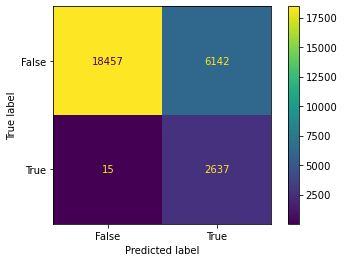

In [115]:
cm_rnd = confusion_matrix(y_test_rnd, y_pred_test_rnd, labels=rnd_clf.classes_)
disp_rnd = ConfusionMatrixDisplay(confusion_matrix=cm_rnd,display_labels=rnd_clf.classes_)

disp_rnd.plot()
plt.show()

The Random Forest model has a predicting outcome of 18457 True Negatives (False), 2637 True Positives (True), and a False Negative and False Positive of 15 and 6142 respectively.

In [116]:
print(classification_report(y_train_rnd,y_pred_train_rnd))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_rnd, y_train_rnd_prob[:,1]))

              precision    recall  f1-score   support

       False       1.00      0.75      0.86      6188
        True       0.80      1.00      0.89      6188

    accuracy                           0.88     12376
   macro avg       0.90      0.88      0.87     12376
weighted avg       0.90      0.88      0.87     12376

Train ROC-AUC Score:  0.9544073720682146


In [117]:
print(classification_report(y_test_rnd,y_pred_test_rnd))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_rnd, y_test_rnd_prob[:,1]))

              precision    recall  f1-score   support

       False       1.00      0.75      0.86     24599
        True       0.30      0.99      0.46      2652

    accuracy                           0.77     27251
   macro avg       0.65      0.87      0.66     27251
weighted avg       0.93      0.77      0.82     27251

Test ROC-AUC Score:  0.8919283941878714


Random Forest Model (Improved) Test Set Overview:

- Class 0 Recall is 0.75 / 75%
- Class 1 Recall is 0.99 / 99%
- Model is overfit

Summary:

Class 0 recall stands at 75%, which indicates to us that the model is quite accurate at classifying Asteroids as not hazardous / not a threat. However, 25% of the time, it may provide us with a false alarm which may or may not have consequences.

Class 1 is at 99%. This indicates that our model is perfect at accurately classifying Asteroids as hazardous / a threat. The risk of an unmonitored Asteroid hitting Earth is therefore almost nullified.

ROC-AUC score of 95% for Train Set and 89% for Test Set. We can conclude that this model is overfit.

#### 4. K-Nearest Neighbors (KNN)

In [420]:
y_train_neigh_prob = neigh.predict_proba(X_train_neigh)
y_test_neigh_prob = neigh.predict_proba(X_test_neigh)

In [421]:
y_pred_train_neigh = neigh.predict(X_train_neigh)
y_pred_test_neigh = neigh.predict(X_test_neigh)

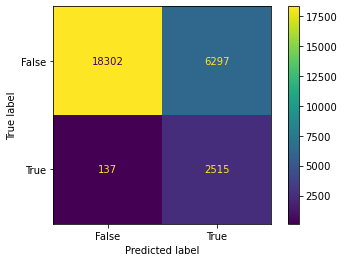

In [422]:
cm_neigh = confusion_matrix(y_test_neigh, y_pred_test_neigh, labels=neigh.classes_)
disp_neigh = ConfusionMatrixDisplay(confusion_matrix=cm_neigh,display_labels=neigh.classes_)

disp_neigh.plot()
plt.show()

The K-Nearest Neighbours model has a predicting outcome of 18302 True Negatives (False), 2515 True Positives (True), and a False Negative and False Positive of 137 and 6297 respectively.

In [423]:
print(classification_report(y_train_neigh,y_pred_train_neigh))
print('Train ROC-AUC Score: ', roc_auc_score(y_train_neigh, y_train_neigh_prob[:,1]))

              precision    recall  f1-score   support

       False       0.95      0.76      0.85      6188
        True       0.80      0.96      0.88      6188

    accuracy                           0.86     12376
   macro avg       0.88      0.86      0.86     12376
weighted avg       0.88      0.86      0.86     12376

Train ROC-AUC Score:  0.9356477275908623


In [424]:
print(classification_report(y_test_neigh,y_pred_test_neigh))
print('Test ROC-AUC Score: ', roc_auc_score(y_test_neigh, y_test_neigh_prob[:,1]))

              precision    recall  f1-score   support

       False       0.99      0.74      0.85     24599
        True       0.29      0.95      0.44      2652

    accuracy                           0.76     27251
   macro avg       0.64      0.85      0.64     27251
weighted avg       0.92      0.76      0.81     27251

Test ROC-AUC Score:  0.8843987959019536


K-Nearest Neighbours Model (Improved) Test Set Overview:

- Class 0 Recall is 0.74 / 74%
- Class 1 Recall is 0.95 / 95%
- Model is overfit

Summary:

Class 0 recall stands at 74%. This indicates that the model is quite accurate at classifying Asteroids as not hazardous / not a threat. However, it may provide us with a false alarm 26% of the time, which may or may not have consequences.

Class 1 is high at 95%. This indicates that our model is excellent at accurately classifying Asteroids as hazardous / a threat. The risk of having an unmonitored Asteroid hitting planet Earth is then minimized.

ROC-AUC score of 93% for Train Set and 88% for Test Set. Thus, this model is overfit.

## X. Model Inference

In [425]:
# Create Inference Data
df_inf = pd.DataFrame([[47000, 35000000, 23, 4.5], [62000, 40000000, 20, 0.5], [58000, 58500000, 21.3, 3.2], [220, 6700, 9.5, 0.47], [190000, 75000000, 28, 6.7], [28000, 16700000, 21, 0.03], [61000, 56300000, 25.8, 0.17], [236000, 74800000, 33.2, 61], [43000, 21700000, 19.6, 0.23], [78700, 58500000, 21.36, 0.52]],
     columns=['relative_velocity','miss_distance','absolute_magnitude', 'est_diameter_avg'])
df_inf

,relative_velocity,miss_distance,absolute_magnitude,est_diameter_avg
0,47000,35000000,23.00,4.50
1,62000,40000000,20.00,0.50
2,58000,58500000,21.30,3.20
3,220,6700,9.50,0.47
4,190000,75000000,28.00,6.70
5,28000,16700000,21.00,0.03
6,61000,56300000,25.80,0.17
7,236000,74800000,33.20,61.00
8,43000,21700000,19.60,0.23
9,78700,58500000,21.36,0.52


In [426]:
pipe_inf = make_pipeline(MinMaxScaler(), RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 'sqrt', random_state=0))
pipe_inf.fit(X_train_final, y_train_miss)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, random_state=0))])

In [427]:
pred_inf = pipe_inf.predict(df_inf)
pred_inf = pd.DataFrame(pred_inf, columns = ['Hazardous?'])
pd.concat([df_inf, pred_inf], axis=1)

,relative_velocity,miss_distance,absolute_magnitude,est_diameter_avg,Hazardous?
0,47000,35000000,23.00,4.50,False
1,62000,40000000,20.00,0.50,True
2,58000,58500000,21.30,3.20,True
3,220,6700,9.50,0.47,True
4,190000,75000000,28.00,6.70,True
5,28000,16700000,21.00,0.03,True
6,61000,56300000,25.80,0.17,False
7,236000,74800000,33.20,61.00,True
8,43000,21700000,19.60,0.23,True
9,78700,58500000,21.36,0.52,True


## XI. Model Saving

In [428]:
pickle.dump(pipe_inf, open('my_mls2_model.pkl', 'wb'))

## XII. Conclusion

To recall, the objective of this notebook is to create a Classification Supervised Machine Learning model in which the model could predict whether an incoming Near Earth Object (or an Asteroid in this case) could be classified as a hazard to planet Earth. Hazardous here indicates that there is potential for the Asteroid to hit Earth.

With this, we will only be looking at the attribute "Recall" where there are two types:

- Class 0 Recall: One where the Positive Outcome is defined as False 
- Class 1 Recall: One where the Positive Outcome is defined as True

To revisit, Class 0 (False) indicates that an Asteroid is not hazardous, whilst Class 1 (True) is the opposite. As such, we are looking at two scenarios:

- Scenario 1: Class 0 Recall = The lower this percentage is, the more the model predicts Asteroid is a NOT A THREAT when in fact IT IS (False Negative)
- Scenario 2: Class 1 Recall = The lower this percentage is, the more the model predicts Asteroid is a THREAT when in fact it is NOT (False Positive)

Only Test Sets are used for the evaluation.

The second scenario has more severe consequences if the value is low than if the first scenario is low. In a condition where Recall for Class 1 is poor, we may be more susceptible in letting Asteroids slip by unmonitored and hitting Earth, causing unimaginable damages and loss of life. On the other hand, in a condition where Recall for Class 0 is poor, we may be more susceptible to false alarms, that may burden us financially / resource wise. Therefore, we would want these two recall values to be as close to 100% as possible.

To summarize, all our models have high recalls for Class 1, with all above 90%, and adequate recalls for Class 0, with all at about 75%. Again, we can understand that the consequence of an Asteroid hitting Earth is bigger than if an Asteroid is categorized as hazardous when in fact it is not. Therefore, we would be ranking the models from worst to best based on the Class 1 Recall:

K-Nearest Neighbours Model:

- Class 0 Recall is 0.75 / 75%
- Class 1 Recall is 0.92 / 92%
- Model is overfit

Logistic Regression Model:

- Class 0 Recall is 0.77 / 77%
- Class 1 Recall is 0.92 / 92%
- Model is just-fit

Decision Tree Model:

- Class 0 Recall is 0.76 / 76%
- Class 1 Recall is 0.98 / 98%
- Model is overfit

Random Forest Model:

- Class 0 Recall is 0.75 / 75%
- Class 1 Recall is 0.99 / 99%
- Model is overfit

The Random Forest model performs best in accurately predicting Asteroids as hazardous to planet Earth.

Looking at the ROC-AUC Scores for all models, we could summarize that most models are overfit, with Logistic Regression the only one to be just-fit. 

After improving our models using Grid Search Cross-Validation we get the following results (ranked from worst to best based on Class 1 Recall once again):

Logistic Regression Model (Improved):

- Class 0 Recall is 0.78 / 78%
- Class 1 Recall is 0.91 / 91%
- Model is just-fit

K-Nearest Neighbours Model (Improved):

- Class 0 Recall is 0.74 / 74%
- Class 1 Recall is 0.95 / 95%
- Model is overfit

Decision Tree Model (Improved):

- Class 0 Recall is 0.76 / 76%
- Class 1 Recall is 0.98 / 98%
- Model is overfit

Random Forest Model (Improved):

- Class 0 Recall is 0.75 / 75%
- Class 1 Recall is 0.99 / 99%
- Model is overfit

The Random Forest model retains its position as best model. Most models are still overfit, with Logistic Regression the only one to be just-fit once again. 